# Polynomial regression 

The example belows uses a temperature-energy dataset in order to illustrate how to perform a non linear regression.

Workflow:
1. Preparation
    - Extract the dataset from the _power_demand_vs_temperature.csv_ 
    - Explore the dataset and check for missing values
    - Plot the distribution
    - Divide the dataset into train and test 
    - Create an evaluation function
2. First experiment
    - Create a linear model 
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
3. Second experiment
    - Create a polynomial regression model with degree 2
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
4. Third experiment
    - repeat the steps done in the second experiment but with degree 3
5. Third experiment
    - repeat the steps done in the second experiment but with degree 4
6. Compare the evaluation of each model


In [2]:
# Code source: Filippo Orazi 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

random_state = 42 # this will be used to guarantee the repeatability of the experiment

## Dataset preparation

### Load the dataset from a `.csv` file
This cell allows full compatibility between execution in Google Colab and in local


In [10]:
url = 'power_demand_vs_temperature.csv'
df = pd.read_csv(url)
df.head()

,date,demand,temp
0,2015-01-01,1.736065,1.7
1,2015-01-02,1.831672,2.2
2,2015-01-03,1.714934,14.4
3,2015-01-04,1.628577,15.6
4,2015-01-05,2.045394,0.0


In [36]:
try:
  import google.colab.files
  IN_COLAB = True
except:
  IN_COLAB = False
# from google.colab import files
if IN_COLAB:
    uploaded = files.upload()

The file must be available in the same directory, or uploaded in the Colab environment in the execution of the previous cell


Set the date column as index

In [11]:
df.set_index('date', inplace=True)

In [12]:
df

,demand,temp
date,,
2015-01-01,1.736065,1.7
2015-01-02,1.831672,2.2
2015-01-03,1.714934,14.4
2015-01-04,1.628577,15.6
2015-01-05,2.045394,0.0
...,...,...
2017-12-27,1.983683,-9.4
2017-12-28,2.001531,-10.0
2017-12-29,1.940514,-7.8


### Explore the dataset and check for missing values


In [38]:
df.describe()

,demand,temp
count,1096.000000,1096.000000
mean,1.831796,16.927737
std,0.329434,10.791581
min,1.316033,-15.000000
25%,1.581654,8.900000
50%,1.731479,18.900000
75%,2.024869,26.100000
max,2.804025,33.900000


In [13]:
null_rows = df.shape[0] - df.dropna(axis=0).shape[0]
print(f"The dataframe has {null_rows} invalid rows")

The dataframe has 0 invalid rows


### Create X and y 

In [14]:
X, y = df.drop(columns=['demand']), df['demand']

print(X.shape, y.shape)

(1096, 1) (1096,)


### Plot the distribution



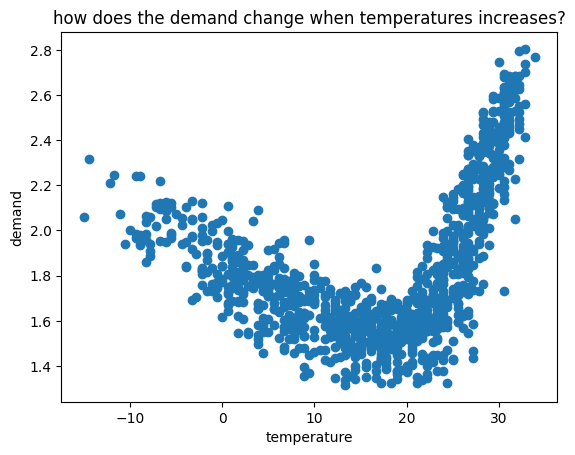

In [18]:
plt.scatter(X, y)
plt.xlabel('temperature')
plt.ylabel('demand')
plt.title('how does the demand change when temperatures increases?')
plt.show()

### Divide the dataset in train and test splits

In [19]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,train_size = 0.7,random_state = random_state)
print(f"Training set and test set have {Xtrain.shape[0]} and {Xtest.shape[0]} elements respectively")

Training set and test set have 767 and 329 elements respectively


### Create an evaluation function to compute, print and return the metrics: rmse r2 f-statistic and p-value

In [43]:
# Computation of F-statistic and p-value for the regression
# http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm

## First experiment
Create a linear model 

Train the model on X_train and y_train 

Evaluate the model on X_test and y_test


In [20]:
def f_test(y_true, y_pred, n_var, n_obs, sn=.95):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    n = n_obs
    p = n_var+1 # number of regression parameters (coefficients + intercept)
    y_true_m = np.mean(y_true)
    SSM = np.sum((y_pred-y_true_m)**2)
    SST = np.sum((y_true-y_true_m)**2)
    SSE = np.sum((y_true-y_pred)**2)
    DFT = n - 1
    DFM = p - 1 # degrees of freedom for model - numerator
    DFE = n - p # degrees of freedom for error - denominator
    DFT = n - 1
    MSM = SSM / DFM
    MSE = SSE / DFE 
    MST = SST / DFT
    F = MSM / MSE
    # f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    p = 1-scipy.stats.f.cdf(F, DFM, DFE) #find p-value of F test statistic 
    return F, p

def print_eval(X, y, model):
    pred = model.predict(X)
    F, p = f_test(y, pred, X.shape[1], X.shape[0])
    print(" Mean squared error: \t{:.5}".format(mean_squared_error(y,pred)))
    print(" r2 score: \t\t{:.5}".format(r2_score(y,pred)))
    print(" f-statistic: \t\t{:.5}".format(F))
    print(" p-value: \t\t{:.5}".format(p))
    return mean_squared_error(pred, y), r2_score(pred, y), F, p

In [21]:
lmodel = LinearRegression()
lmodel.fit(X.temp.values.reshape(-1,1), y)
lin = print_eval(Xtest, ytest, lmodel)

 Mean squared error: 	0.10016
 r2 score: 		0.1803
 f-statistic: 		53.273
 p-value: 		2.2197e-12


C:\Users\39392\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


#### Visualize the prediction of the model 

C:\Users\39392\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


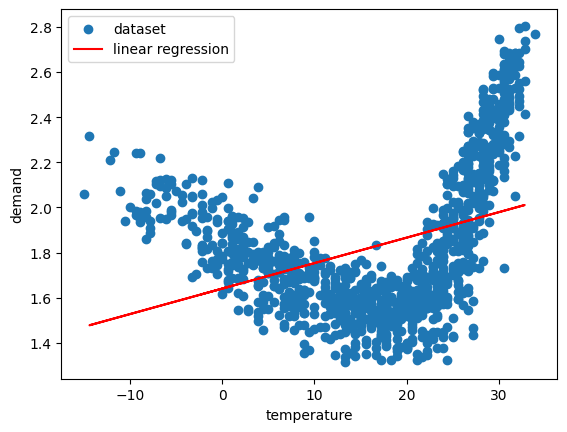

In [22]:
plt.scatter(X, y)
plt.plot(Xtest, lmodel.predict(Xtest), 'r')
plt.xlabel('temperature')
plt.ylabel('demand')
plt.legend(['dataset', 'linear regression'])
plt.show()

## Second experiment - Polynomial regression
We can clearly see that the linear regression model cannot really approximate the data distribution.

We can now try with a non linear regression model:
1. Use the sklearn fucntion _PolynomialFeature_ to create a new array of features. Set _degree=2_ and _include_bias=False_
2. Train a Linear regression model with the new features
3. Evaluate the model 
4. Visualize the predicted values of the model

#### Polynomial degree = 2

In [59]:
polFea = PolynomialFeatures(2,include_bias=False)
X_poly = polFea.fit_transform(Xtrain.values) # makes data suitable for a multivariate (deg = 2) regression
model = LinearRegression()
model.fit(X_poly, ytrain) # always linear regression

LinearRegression()

In [61]:
pol = print_eval(polFea.transform(Xtest), ytest, model)

 Mean squared error: 	0.033456
 r2 score: 		0.72619
 f-statistic: 		384.89
 p-value: 		1.1102e-16


C:\Users\39392\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


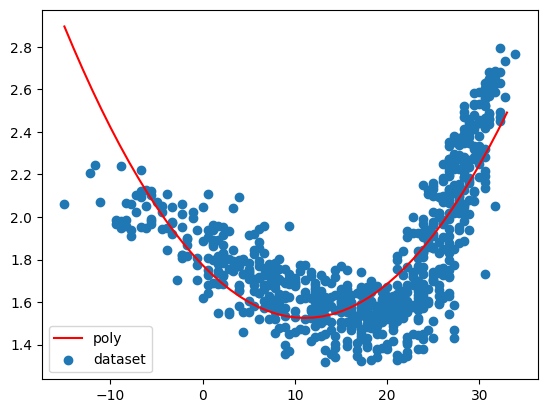

In [82]:
pred = model.predict(polFea.transform((np.arange(min(X.temp), max(X.temp))).reshape(-1,1)))
plt.plot(np.arange(min(X.temp), max(X.temp)),pred, label = "poly",color="red")
plt.scatter(Xtrain,ytrain, label = 'dataset')
plt.legend()
plt.show()

## Third experiment

#### Polynomial degree = 3

In [83]:
polFea = PolynomialFeatures(3,include_bias=False)
X_poly = polFea.fit_transform(Xtrain.values)#.reshape(-1,1))
model = LinearRegression()
model.fit(X_poly, ytrain)

LinearRegression()

In [85]:
pol = print_eval(polFea.transform(Xtest), ytest, model)

 Mean squared error: 	0.021749
 r2 score: 		0.822
 f-statistic: 		502.32
 p-value: 		1.1102e-16


C:\Users\39392\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


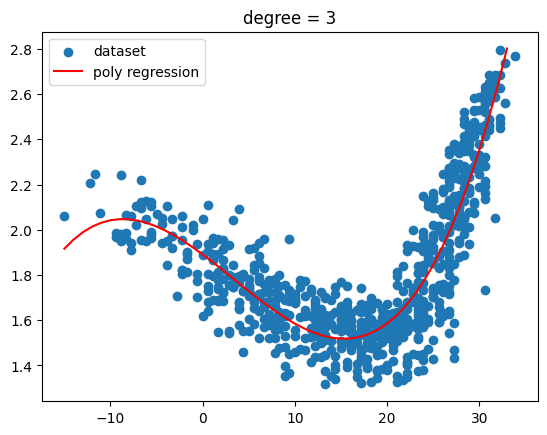

In [89]:
ypred = model.predict(polFea.transform(np.arange(min(Xtrain.temp), max(Xtrain.temp)).reshape(-1,1)))

plt.scatter(Xtrain, ytrain)
plt.plot(np.arange(min(Xtrain.temp), max(Xtrain.temp)), ypred, 'r')
plt.legend(['dataset', 'poly regression'])
plt.title('degree = 3')
plt.show()

## Fourth experiment
### Polynomial degree = 4

## Compare the performance of the four models

ValueError: Found input variables with inconsistent numbers of samples: [767, 329]

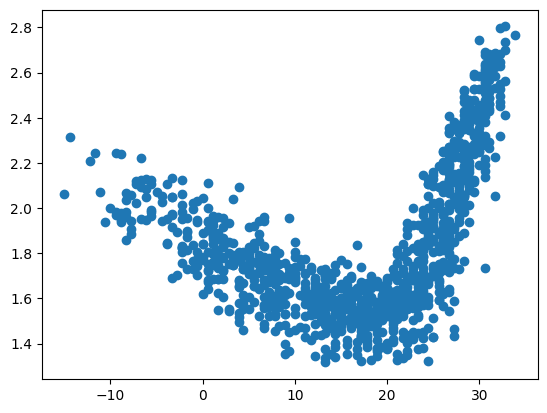

In [35]:
degrees = [*range(1, 5)]
results = pd.DataFrame(columns = ['degree', 'mse'])

plt.scatter(X, y)

for degree in degrees:
    
    polFea = PolynomialFeatures(degree, include_bias = False)
    Xtrain_new = polFea.fit_transform(Xtrain)
    Xtest_new = polFea.transform(Xtest)
    
    lr = LinearRegression()
    lr.fit(Xtrain_new, ytrain)
    ypred = lr.predict(Xtest_new)
    mse = mean_squared_error(ytrain, ypred, squared = False)
    
    results[len(results)] = [degree, mse]
    
    plt.plot(np.arange(min(Xtest_new.temp), max(Xtest_new.temp)), pred, label = f"degree = {degree}")

plt.legend()
plt.show()